# Employee Retention Prediction

## - Problem Statement
Hiring and retaining top talent is an extremely challenge because companies spend 15-20 percent of the employees' salary to recruit in a new candidate. In this case, HR team extensive data on their emplyees, and ask for developing a model that could predict which employees are more likely to quit.

## - Load Data

In [738]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 100)

%matplotlib inline

In [739]:
employees_df = pd.read_csv('data/Human_Resources.csv')
employees_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [740]:
employees_df.shape

(1470, 35)

In [741]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [742]:
employees_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## - Visualize Data

In [743]:
# converse dataset's categorical values to numerical values, 0 and 1

# target
employees_df['Attrition'] = employees_df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0)

# Over18
employees_df['Over18'] = employees_df['Over18'].apply(lambda x : 1 if x == 'Y' else 0)

# OverTime
employees_df['OverTime'] = employees_df['OverTime'].apply(lambda x : 1 if x == 'Yes' else 0)

In [744]:
employees_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [745]:
employees_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

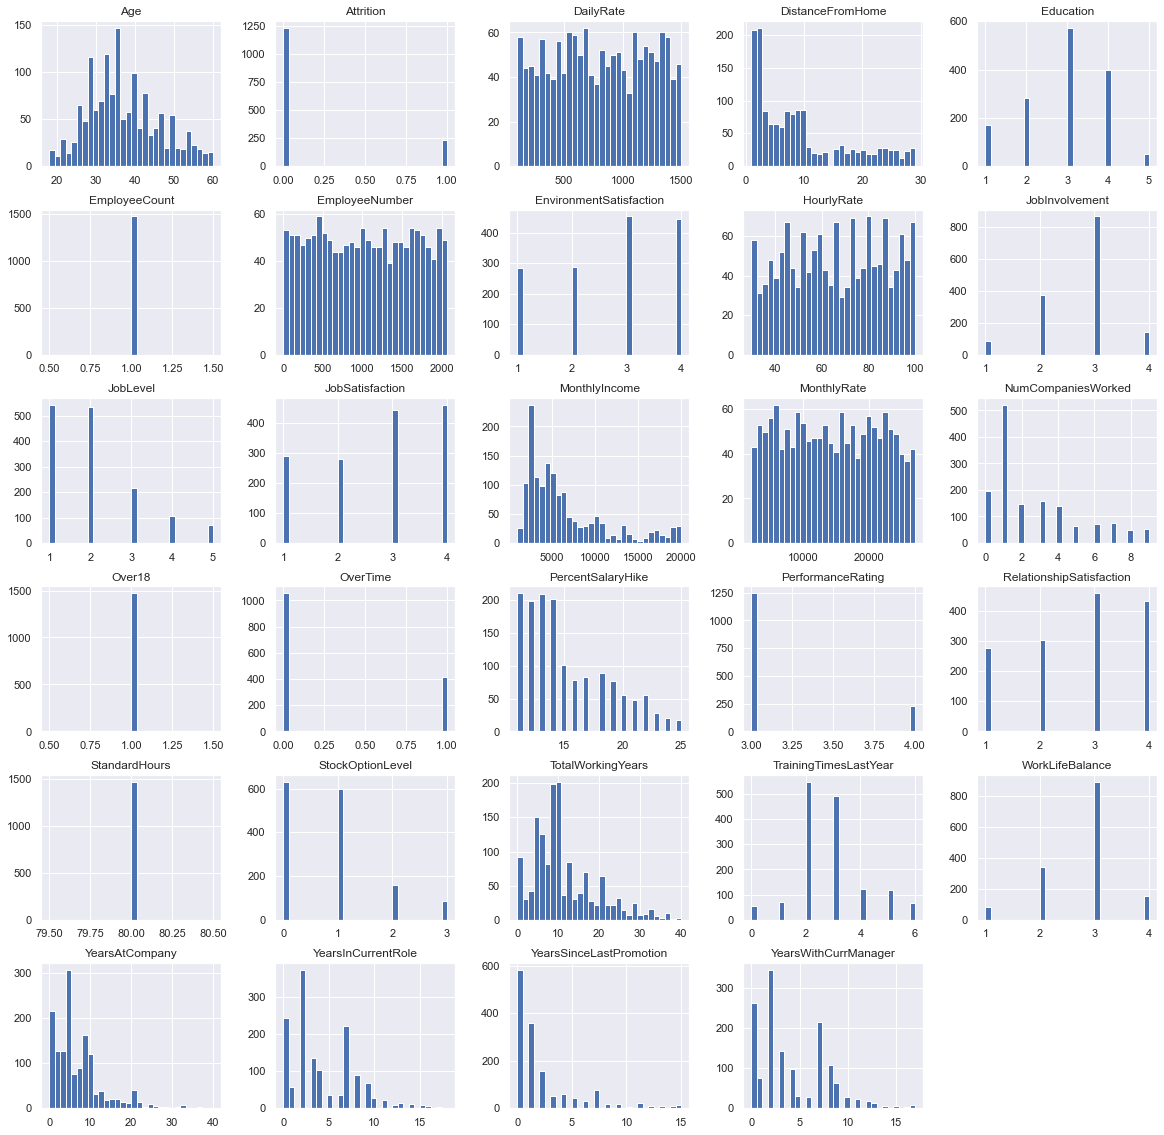

In [746]:
# check the distribution of each feature
employees_df.hist(bins=30, figsize=(20, 20));

- Some features are tail heavy
- Drop 'EmployeeCount', 'Over18', 'StandardHours' because there are only one value for each

In [747]:
employees_df.drop(columns=['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)

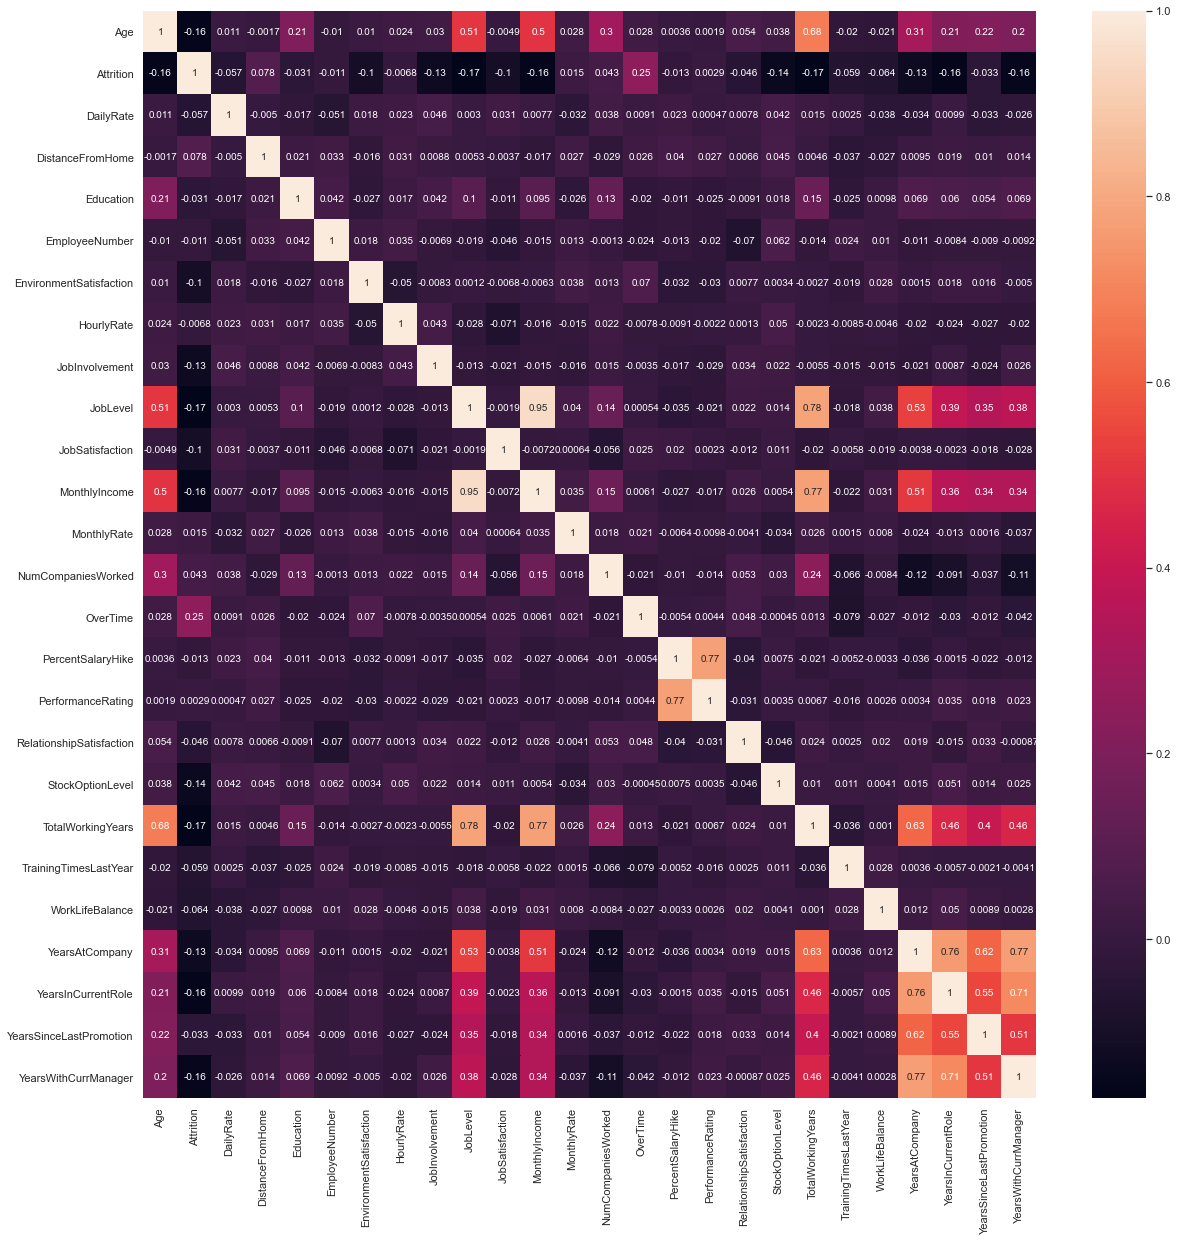

In [748]:
# check the correlation of each feature
plt.figure(figsize=(20, 20))
correlation = employees_df.corr()
sns.heatmap(correlation, annot=True);

- JobLevel is strongly correlated with total WorkingHours
- MonthlyIncome is strongly correlated with JobLevel
- MonthlyIncome is strongly correlated with total WorkingHours
- Age is stongly correlated with MonthlyIncome

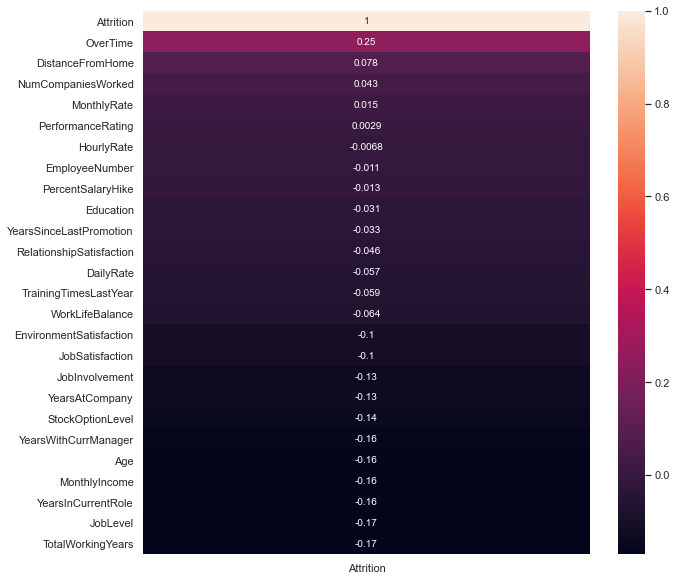

In [749]:
# check the correlation of each feature with target
plt.figure(figsize=(10, 10))
corr = employees_df.corr()
corr_sort = corr.sort_values(by='Attrition', ascending=False)
sns.heatmap(corr_sort[['Attrition']], annot=True);

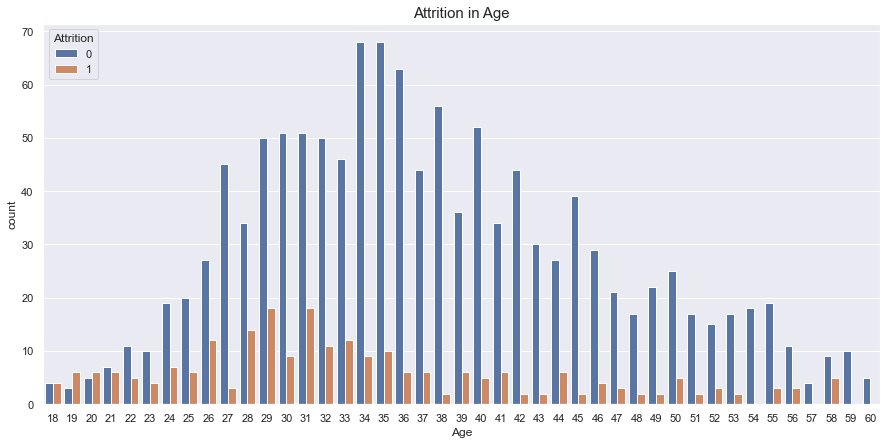

In [750]:
# what age employees more likely left and stay
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', hue='Attrition', data=employees_df)
plt.title('Attrition in Age', fontdict={'size':15});

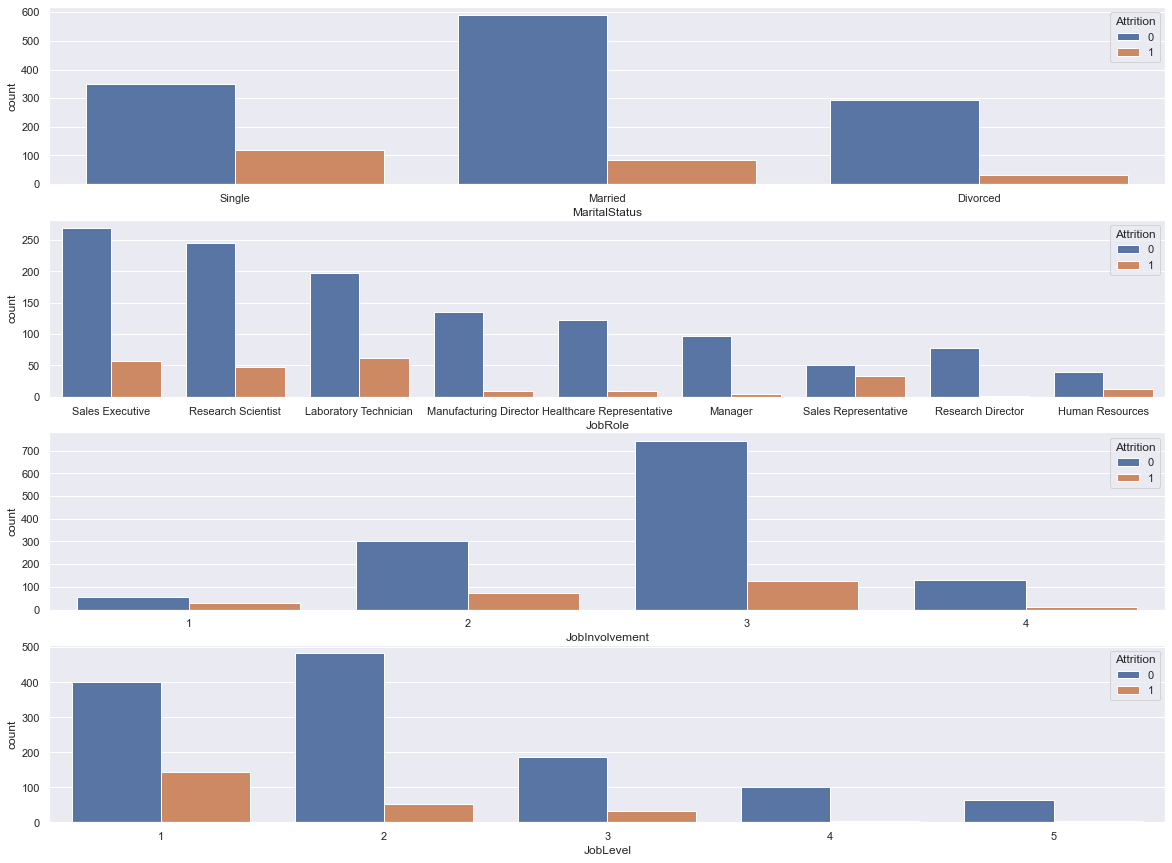

In [751]:
plt.figure(figsize=(20, 15))

plt.subplot(4, 1, 1)
sns.countplot(x='MaritalStatus', hue='Attrition', data=employees_df)

plt.subplot(4, 1, 2)
sns.countplot(x='JobRole', hue='Attrition', data=employees_df)

plt.subplot(4, 1, 3)
sns.countplot(x='JobInvolvement', hue='Attrition', data=employees_df)

plt.subplot(4, 1, 4)
sns.countplot(x='JobLevel', hue='Attrition', data=employees_df)
plt.tight_layout;

- Single employees tend to leave compared to married and divorced
- Sales Representitives tend to leave compared to any other job 
- Less involved employees tend to leave the company 
- Less experienced (low JobLevel) tend to leave the company

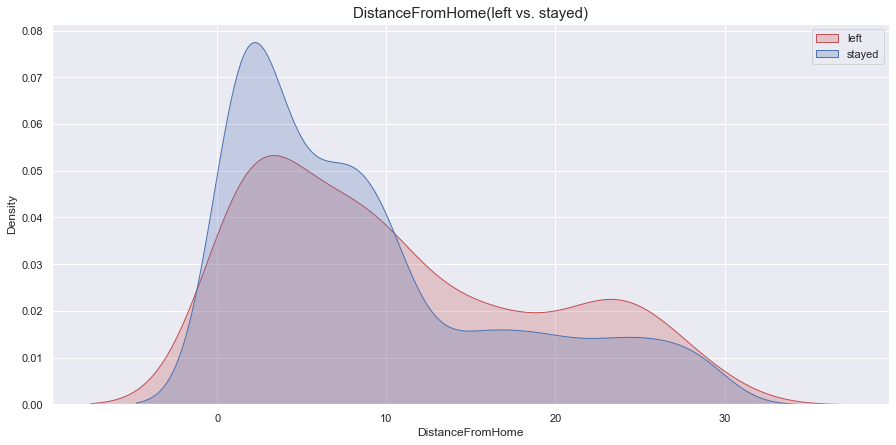

In [752]:
# visualizing the probability density of a continuous variable
left_df = employees_df[employees_df['Attrition'] == 1]
stayed_df = employees_df[employees_df['Attrition'] == 0]

plt.figure(figsize=(15, 7))
sns.kdeplot(x=left_df['DistanceFromHome'], shade=True, color='r', label='left')
sns.kdeplot(x=stayed_df['DistanceFromHome'], shade=True, color='b', label='stayed')
plt.title('DistanceFromHome(left vs. stayed)', fontdict={'size':15})
plt.legend();

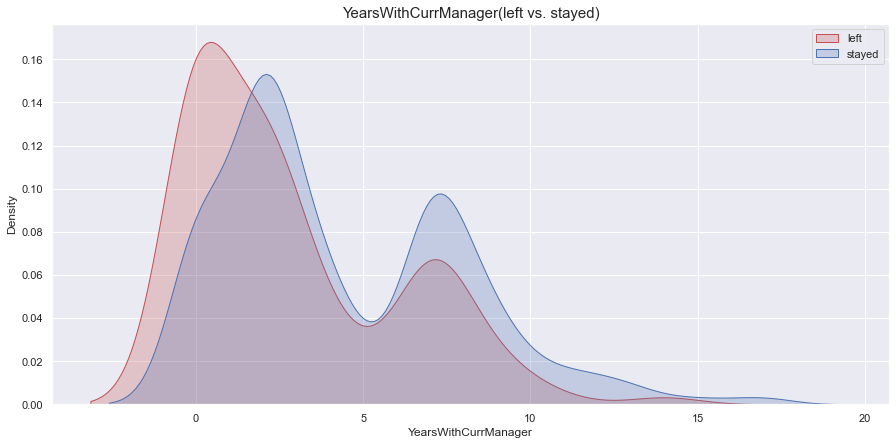

In [753]:
plt.figure(figsize=(15, 7))
sns.kdeplot(x=left_df['YearsWithCurrManager'], shade=True, color='r', label='left')
sns.kdeplot(x=stayed_df['YearsWithCurrManager'], shade=True, color='b', label='stayed')
plt.title('YearsWithCurrManager(left vs. stayed)', fontdict={'size':15})
plt.legend();

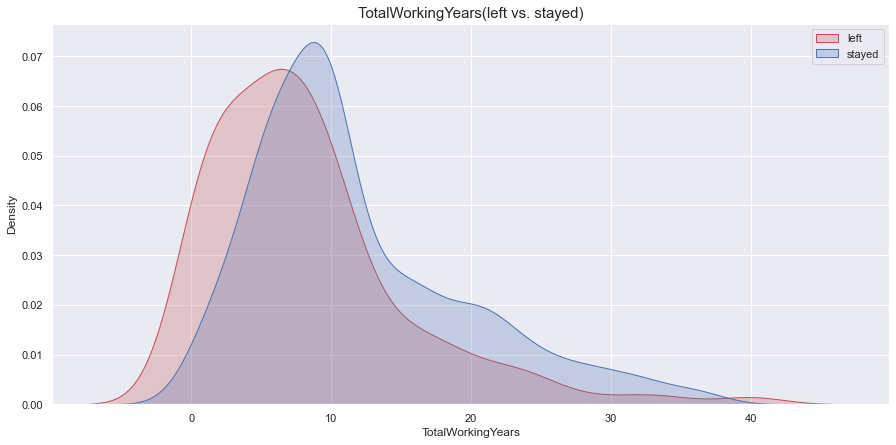

In [754]:
plt.figure(figsize=(15, 7))
sns.kdeplot(x=left_df['TotalWorkingYears'], shade=True, color='r', label='left')
sns.kdeplot(x=stayed_df['TotalWorkingYears'], shade=True, color='b', label='stayed')
plt.title('TotalWorkingYears(left vs. stayed)', fontdict={'size':15})
plt.legend();

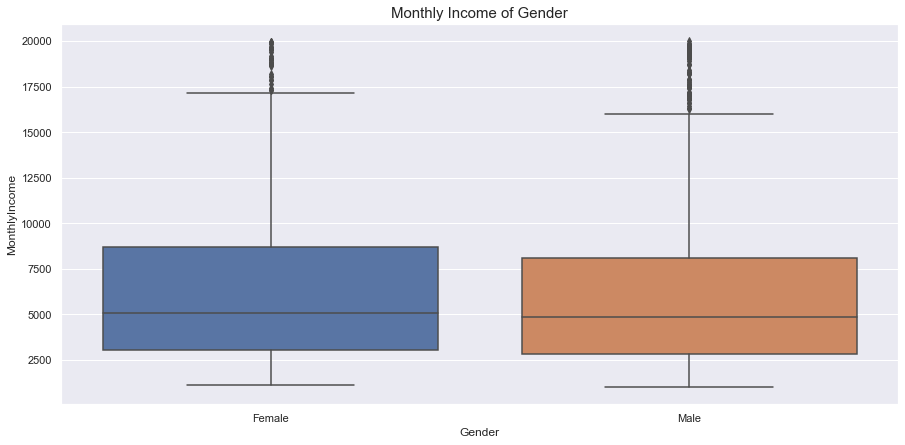

In [755]:
# check gender's monthly income
plt.figure(figsize=(15, 7))
sns.boxplot(x='Gender', y='MonthlyIncome', data=employees_df)
plt.title('Monthly Income of Gender', fontdict={'size':15});

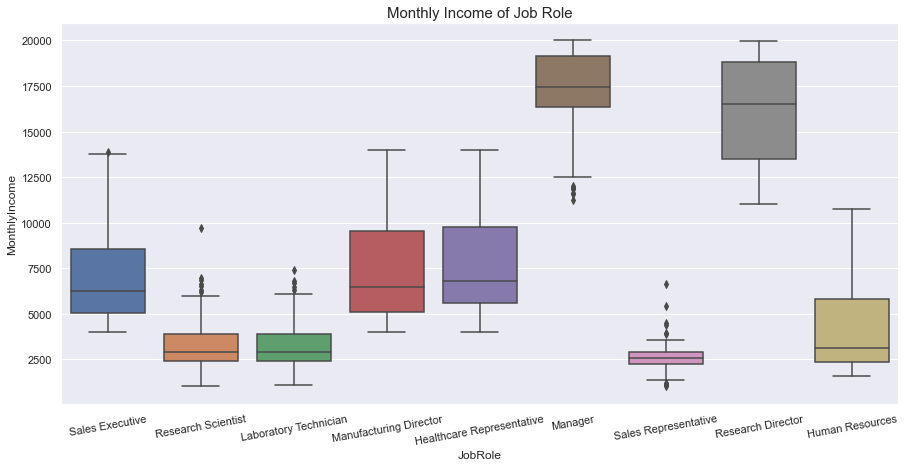

In [756]:
# check monthly income of job role
plt.figure(figsize=(15, 7))
sns.boxplot(x='JobRole', y='MonthlyIncome', data=employees_df)
plt.title('Monthly Income of Job Role', fontdict={'size':15})
plt.xticks(rotation=10);

In [757]:
employees_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## - One-hot-encoding for Categorical Variables

In [758]:
X_categorical = employees_df[['BusinessTravel','Department','EducationField',
                              'Gender','JobRole','MaritalStatus']]
X_categorical.head(2)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married


In [759]:
X_categorical = pd.get_dummies(X_categorical, drop_first=True)
X_categorical.head(2)

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


## - Concat Numerical Variables and Categorical Variables

In [760]:
X_numerical = employees_df.drop(['BusinessTravel','Department','EducationField',
                                 'Gender','JobRole','MaritalStatus','Attrition'], axis=1)

In [761]:
X_all = pd.concat([X_numerical, X_categorical], axis=1)
X_all.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [762]:
X_all.shape

(1470, 45)

In [763]:
y = employees_df['Attrition']

## - Split Dataset

In [764]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [765]:
y_train.value_counts()

0    913
1    189
Name: Attrition, dtype: int64

## - Data Imbalance

In [766]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (1826, 45)
After OverSampling, the shape of train_y: (1826,) 

After OverSampling, counts of label '1': 913
After OverSampling, counts of label '0': 913


## - Modeling

### 1. Logistic Regression

In [767]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [768]:
# instantiate a StandardScaler + Logistic Regression pipeline
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

In [769]:
pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression())])

In [770]:
# Evaluate.
pipe.score(X_test, y_test)

0.7771739130434783

In [771]:
# Get params for GridSearchCV
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lr', LogisticRegression())],
 'verbose': False,
 'ss': StandardScaler(),
 'lr': LogisticRegression(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False}

In [772]:
# instantiate a StandardScaler + Logistic Regression pipeline again if has a higher score
pipe_2 = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

In [773]:
# difine hyperparameter dictionary
pipe_2_params = {'lr__penalty': ['l1', 'l2'], 'lr__C': [0.1, 0.5, 1, 1.5, 2]}

In [774]:
# instantiate GridSearch object
gs = GridSearchCV(pipe_2, # What is the model we want to fit?
                  pipe_2_params, # What is the dictionary of hyperparameters?
                  cv=5) # What number of folds in CV will we use?

In [775]:
# fit the GridSearchCV object to the data.
gs.fit(X_train_res, y_train_res)

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (sol

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (sol

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (sol

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 0.5, 1, 1.5, 2],
                         'lr__penalty': ['l1', 'l2']})

In [776]:
# Print out best score.
gs.best_score_

0.8170970881053969

In [777]:
# Print out best estimator.
gs.best_estimator_

Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression(C=0.1))])

In [778]:
gs.score(X_train_res, y_train_res), gs.score(X_test, y_test)

(0.8324205914567361, 0.782608695652174)

**Model Metric - Confusion Matrix**

In [779]:
# predict
y_pred = gs.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [780]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [781]:
print('Accuracy {}%'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 78.26086956521739%


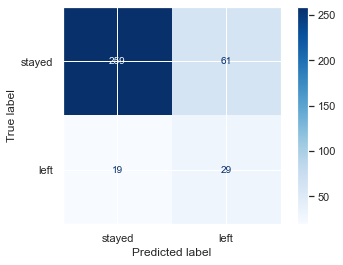

In [782]:
# option 1
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['stayed', 'left']);

In [783]:
# option 2
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, columns=['predict-stayed', 'predict-left'], index=['actual-stayed', 'actual-left'])
cm_df

,predict-stayed,predict-left
actual-stayed,259,61
actual-left,19,29


In [784]:
recall = 29 / (29 + 61)
recall

0.32222222222222224

In [785]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       278
           1       0.60      0.32      0.42        90

    accuracy                           0.78       368
   macro avg       0.71      0.63      0.64       368
weighted avg       0.76      0.78      0.76       368



**Check Out Coefficient**

In [786]:
# this is going to be wonky becuase it's still in log terms - so we need to exponentiate it to get 
# the interpretable coefs
lr.coef_

array([[-0.47623041, -0.41504961,  0.37323334,  0.94481641, -0.65244296,
         0.92002339, -0.75967724,  0.4636941 , -0.49286806,  0.59245803,
         0.53314054,  0.09753486,  0.22424801, -0.32514253, -0.16217803,
         0.34252732,  0.76112366,  0.37744465,  0.44790828,  0.41180221,
         0.66692296]])

In [787]:
# using np.exp() to exponentiate the coefficient
coefs = np.exp(lr.coef_)
cols = employees_df.columns

In [788]:
list(zip(coefs[0], cols)) # or: [*(zip(coefs[0], cols))]

[(0.6211203503737239, 'Age'),
 (0.660307525280329, 'Attrition'),
 (1.4524232023646473, 'BusinessTravel'),
 (2.572341088299362, 'DailyRate'),
 (0.5207719979271775, 'Department'),
 (2.509349092021891, 'DistanceFromHome'),
 (0.4678173952471545, 'Education'),
 (1.5899365269202481, 'EducationField'),
 (0.6108718637953372, 'EmployeeNumber'),
 (1.8084281216370128, 'EnvironmentSatisfaction'),
 (1.704276263011743, 'Gender'),
 (1.1024498745025129, 'HourlyRate'),
 (1.2513813405203886, 'JobInvolvement'),
 (0.7224243799655446, 'JobLevel'),
 (0.8502898127482564, 'JobRole'),
 (1.4085028294800634, 'JobSatisfaction'),
 (2.1406802677272623, 'MaritalStatus'),
 (1.4585527034341061, 'MonthlyIncome'),
 (1.5650351424207791, 'MonthlyRate'),
 (1.5095358397073404, 'NumCompaniesWorked'),
 (1.9482332907337208, 'OverTime')]

**Reducing data's dimensions (origin is [ 1102, 45 ] )**

In [789]:
pipe_3 = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

In [790]:
# reduce feature dimensions, original is (1102, 45)
X_embedded = SelectFromModel(lr, norm_order=1)

In [791]:
X_embedded_train = X_embedded.fit_transform(X_train_res, y_train_res)
X_embedded_test = X_embedded.transform(X_test)

In [792]:
# feature dimensions after reducing
X_embedded_train.shape

(1826, 21)

In [793]:
pipe_3_params = {'lr__penalty': ['l1', 'l2'], 'lr__C': [0.1, 0.5, 1, 1.5, 2]}

In [794]:
gs_3 = GridSearchCV(pipe_3,
                    pipe_3_params, 
                    cv=5)

In [795]:
gs_3.fit(X_embedded_train, y_train_res)

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (sol

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (sol

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': [0.1, 0.5, 1, 1.5, 2],
                         'lr__penalty': ['l1', 'l2']})

In [796]:
gs_3.score(X_embedded_train, y_train_res)

0.8023001095290252

In [797]:
gs_3.score(X_embedded_test, y_test)

0.7608695652173914

**Cotinueing going deeply (Drawing learning curve of C hyperparameter)**

In [798]:
original_X = []
reducing_X = []

C = np.arange(0.01, 2.01, 0.1)

for i in C:
    lr = LogisticRegression(C=i, random_state=42)
    lr.fit(X_train_res, y_train_res)
    original_X.append(lr.score(X_train_res, y_train_res))
    
    X_embedded = SelectFromModel(lr,norm_order=1)
    X_embedded_train = X_embedded.fit_transform(X_train_res, y_train_res)
    X_embedded_test = X_embedded.transform(X_test)
    reducing_X.append(cross_val_score(lr,X_embedded_train, y_train_res, cv=10).mean())

print('The max training score before embedded: {}'.format(max(original_X)))
print('The optimal C value: {}\n'.format(C[original_X.index(max(original_X))]))
print('The max training score after embedded: {}'.format(max(reducing_X)))
print('The optimal C value: {}'.format(C[reducing_X.index(max(reducing_X))]))

The max training score before embedded: 0.8340635268346112
The optimal C value: 1.61

The max training score after embedded: 0.8022818711343301
The optimal C value: 0.21000000000000002


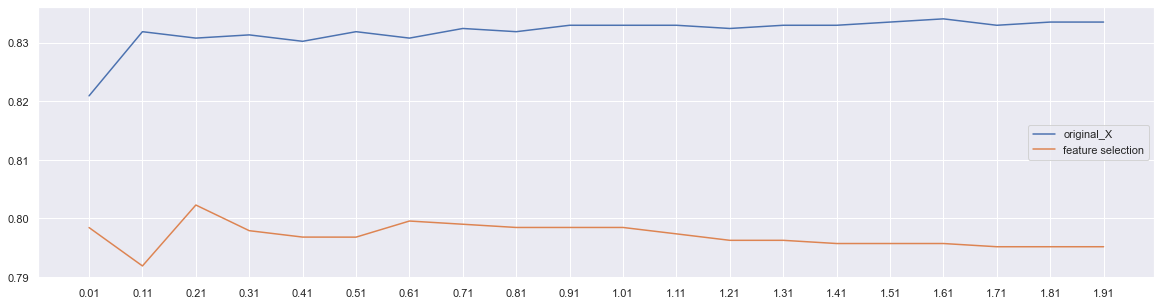

In [799]:
plt.figure(figsize=(20,5))
plt.plot(C, original_X, label='original_X')
plt.plot(C, reducing_X, label='feature selection')
plt.xticks(C)
plt.legend();

In [800]:
# Validate model performance: before embedded and model after embedded

# before embedded
lr = LogisticRegression(C=1.61, random_state=42)
lr.fit(X_train_res, y_train_res)
lr.score(X_test, y_test)

0.7744565217391305

In [801]:
# after embedded
lr = LogisticRegression(C=0.21, random_state=42)
lr.fit(X_embedded_train, y_train_res)
lr.score(X_embedded_test, y_test)

0.7336956521739131

The model performance is worse than the dataset without dimension reduction.

### 2. Random Forest

In [802]:
from sklearn.ensemble import RandomForestClassifier

In [803]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

**Model Evaluation**

In [804]:
cross_val_score(rf, X_train_res, y_train_res, cv=5).mean()

0.935457743843102

In [805]:
cross_val_score(rf, X_test, y_test, cv=5).mean()

0.8696038504257683

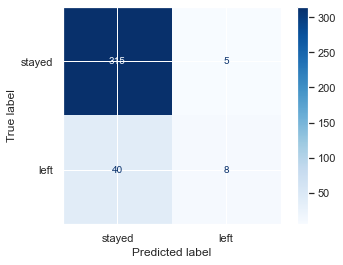

In [806]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['stayed', 'left']);

In [807]:
recall = 11 / (11 + 7)
recall

0.6111111111111112

In [808]:
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [809]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       355
           1       0.17      0.62      0.26        13

    accuracy                           0.88       368
   macro avg       0.58      0.75      0.60       368
weighted avg       0.96      0.88      0.91       368



In [810]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [811]:
rf_params = {
    'max_depth': np.arange(1, 20, 1),
    'n_estimators': np.arange(0, 150, 10)
}

In [812]:
gs_rf = GridSearchCV(rf, rf_params, cv=5)
gs_rf.fit(X_train_res, y_train_res)

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 348, in fit
    self._validate_estimator()
  File "/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 135, in _validate_estimator
    "got {0}.".format(self.n_estimators))
ValueError: n_estimators must be greater than zero, got 0.

  FitFailedWarning)
/Applications/anaconda3/envs/my_conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarn

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140])})

In [813]:
print(gs_rf.best_score_)

0.9332749457294707


In [814]:
gs_rf.best_params_

{'max_depth': 15, 'n_estimators': 120}

In [815]:
gs_rf.score(X_train_res, y_train_res), gs_rf.score(X_test, y_test)

(1.0, 0.8695652173913043)

## - Conclusion
In this case, both of Logistic Regression model and Random Forest model didn't have a very good performance. I think if we want to have a high accuracy for retention of employees that based on this dataset is not enough. Employees' turnover there are many factors, and most of them would be invisible. Thus, We should use the an employee's behavioral characteristics to predict whether an employee wants to leave or not. That's would be more reasonable.